In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
np.random.seed(42)
data_size = 300
study_hours = np.random.randint(1,10,data_size)
mock_score = np.random.randint(30,100,data_size)
internship = np.random.choice([0,1],data_size)

placed=((study_hours>5).astype(int)+
        (mock_score>65).astype(int)+
        internship)>=2
df=pd.DataFrame({"study_hours":study_hours,
                 "mock_score":mock_score,
                 "internship":internship,
                 "placed":placed.astype(int)})
df.head()

,study_hours,mock_score,internship,placed
0,7,46,0,0
1,4,62,0,0
2,8,38,0,0
3,5,72,1,1
4,7,77,1,1


In [4]:
x=df.drop("placed",axis=1)
y=df["placed"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42, stratify=y)

In [6]:
scalar = StandardScaler()

x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [7]:
svm_model = SVC(kernel = "rbf",
                C = 1.5,
                gamma = "scale",
                probability = True)
svm_model.fit(x_train_scaled, y_train)

,C,1.5
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [8]:
y_pred = svm_model.predict(x_test_scaled)
print("Accuracy:",accuracy_score(y_test,y_pred))

print("\nconfusion matrix :\n",confusion_matrix(y_test,y_pred))
print("\nclassification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9666666666666667

confusion matrix :
 [[33  1]
 [ 1 25]]

classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.96      0.96      0.96        26

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



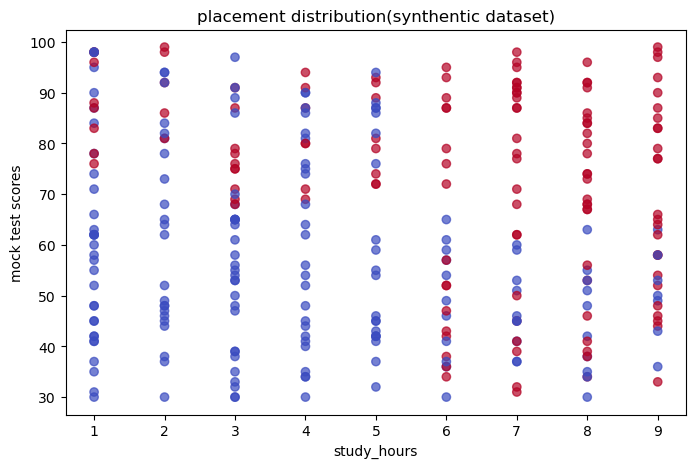

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(x["study_hours"],
            x["mock_score"],
            c=y,
            cmap="coolwarm",
            alpha=0.7)
plt.xlabel("study_hours")
plt.ylabel("mock test scores")
plt.title("placement distribution(synthentic dataset)")
plt.show()